I recently replied to an reddit [/r/askscience post](https://www.reddit.com/r/askscience/comments/59frj2/could_someone_explain_what_this_iupac_definition/) that got me overthinking about something so simple, I just had to write a post about it. The main crux of the issue is simple. At a base level, what is a molecule? As I'll show you now, a rigorous definition is a bit tricky. International Union of Pure and Applied Chemistry is basically the chemical naming authority. Here's [IUPAC's definition of molecule](https://goldbook.iupac.org/M04002.html):

 >An electrically neutral entity consisting of more than one atom (n > 1). Rigorously, a molecule, in which  n > 1 must correspond to a depression on the potential energy surface that is deep enough to confine at least one vibrational state.

Let's break this down into pieces

> An electrically neutral entity consisting of more than one atom (n > 1)
    
Fair enough, if this were the whole definition then any arrangement of 2 or more atoms constitutes a molecule. This is a bit weird, considering that basically everything falls into this category, as long as it doesn't hold a charge. However there's not too much to discuss on this point. 

> Rigorously, a molecule, in which  n > 1 must correspond to a depression on the potential energy surface that is deep enough to confine at least one vibrational state.
    
What? Potential energy surface? Confined vibrations?? What does this have to do with a molecule? 

Quite a lot actually, let's dig in!

## Potential Energy Surface (PES)

---

We chemists like to use the phrase Potential Energy Surface a lot, so much so that we invented an acronym for it. The PES basically tells us how the energy changes as atoms move around. Let's take a look at an example PES:

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='html5')

import numpy as np


def lennard_jones(r, sigma, epsilon):
    return 4.0 * epsilon * ((sigma/r)**12 - (sigma/r)**6)
   
def plot_pes(ax, V):
    ax.plot(r, V, zorder=0)
    ax.set_ylim(-1, 1)
    ax.set_xlim(1.4, 3)
    ax.set_xlabel('Distance Between Atom Centers')
    ax.set_ylabel('Energy')
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
def plot_viblevels(ax):
    r = np.linspace(1, 3, 500)
    V = lennard_jones(r, 1.5, 0.9)
    plot_pes(ax)
    
def plot_atomsep(ax, r):
    circle1 = plt.Circle((1.5 + r/2.0 , 0), 0.7)
    circle2 = plt.Circle((1.5 - r/2.0 , 0), 0.7)
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)

def plot_dot(ax, x, y, r):
    circle = plt.Circle((x, y), r)
    ax.add_artist(circle)
    
    
r = np.linspace(1, 3, 500)
V = lennard_jones(r, 1.5, 0.9) 

def plot_sidebyside(ax1, ax2, idx):
    plot_pes(ax1, V)
    plot_dot(ax1, r[idx], V[idx], r=0.05)
    plot_atomsep(ax2, r[idx]**1.5 - 1.5)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
plot_sidebyside(ax1, ax2, 125)

Here is a typical PES for a two-atom molecule such as H2 or N2. As you can see, the energy is very high towards the left, which is when we start smashing the two nuclei into one another. 

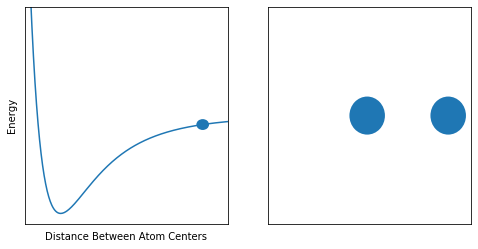

In [2]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
plot_sidebyside(ax1, ax2, 450)

At the other extreme on the right, the curve begins to level out. This is because the atoms are so far apart, moving them farther away does nothing, since they are completely independent. 

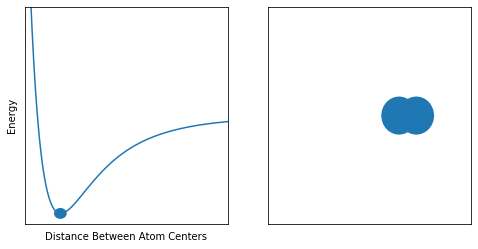

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
plot_sidebyside(ax1, ax2, 170)

Lastly, we have the case where the atoms are in their lowest energy arrangement. Since nature likes moving towards a low energy state, this is the most stable form of the molecule. The distance at which this occurs is the **bond length**.

So, we can think of a molecule forming from atoms **when the lowest energy point of the PES is not the atoms being far apart**. An example where this might not happen is in the following PES:

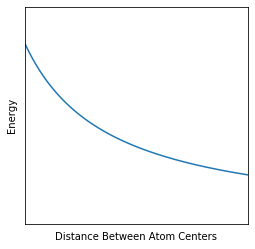

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
V2 = 1/(r - 0.8) - 1
plot_pes(ax, V2)

Notice how the energy keeps going down as you increase the distance. This means that the atoms will constantly want to keep getting farther apart, and **you have no molecule!** In the words of IUPAC, a surface that looks like this has no depression whatsoever!

## Vibrational State

---

Ok so we've learned that in order to have a molecule, we need to have a PES with a *depression* in it. Most of the time we call such a depression a **potential well**. This is because a potential well is lower than the points around it, much like a regular well. However, atoms in molecules are always vibrating about. What does this mean for our molecules' existance? It means that the vibration can't have too much energy, or else the molecule will **tear itself apart**. Let's draw some pictures to clarify. 

Here is what it would look like for a molecule to be safely vibrating, but still staying together:


In [5]:
from matplotlib.animation import FuncAnimation

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

nframes = 120

def animate(i):
    ax1.clear()
    ax2.clear()
    r = 1.76 + np.sin(i * 2 * np.pi / 60) * 0.2  # 60 frames per cycle
    _ = plot_pes(ax1, V)
    _ = plot_dot(ax1, r, lennard_jones(r, 1.5, 0.9), r=0.05)
    _ = plot_atomsep(ax2, r**1.5 - 1.5)

ani = FuncAnimation(fig, animate, interval=20, frames=np.arange(nframes))
plt.close()
ani

And here is what it would look like if the molecule's vibration had so much energy that it fell apart!

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

nframes = 120
V3 = lennard_jones(r, 1.5, 0.1)

def animate(i):
    ax1.clear()
    ax2.clear()
    r = np.linspace(1.5, 4, nframes)[i] 
    plot_pes(ax1, V3)
    plot_dot(ax1, r, lennard_jones(r, 1.5, 0.1), r=0.05)
    plot_atomsep(ax2, r**1.5 - 1.5)

ani = FuncAnimation(fig, animate, interval=20, frames=np.arange(nframes))
plt.close()
ani

Note that the second case has a much shallower potential well. This explains what IUPAC means when they say, 

>depression on the potential energy surface that is deep enough to confine at least one vibrational state.

In our second gif, the molecule's well is so shallow that the atoms just fall apart!

But in the first gif, the well is deeper and the atoms get trapped inside! We have a **stable** molecule, which is the question we tried to answer!
